<a href="https://colab.research.google.com/github/raulsulla/foto1/blob/main/Modelo_3_variando_optimizador_semana_3_Regresion_NN_M1RAul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo 3-IA con Python seman 3 : Regresion REdes Neuronales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential, layers

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
# Mounted at /content/drive

In [4]:
path="/content/drive/MyDrive/Python/semana 3/Precio_Depas.xlsx"

df=pd.read_excel(path,sheet_name=0)
dataset=df.copy()
dataset.head()

,Baños,Dormitorios,Tamaño,Precio
0,1,1,41,316386
1,1,1,42,310398
2,1,1,37,278472
3,2,2,53,444698
4,2,2,58,447596


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Baños        25 non-null     int64
 1   Dormitorios  25 non-null     int64
 2   Tamaño       25 non-null     int64
 3   Precio       25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [6]:
dataset=dataset.dropna()

In [7]:
data_train=dataset.sample(frac=0.8,random_state=0)
data_test = dataset.drop(data_train.index)

print(data_train)
print(data_test)

    Baños  Dormitorios  Tamaño   Precio
5       2            3      61   488195
2       1            1      37   278472
19      2            3      79   655464
16      2            3      70   494760
11      2            2      58   412158
22      3            3      89   814399
17      3            3      99   762600
24      4            3     120  1068693
23      2            3      79   622690
14      2            2      64   450120
1       1            1      42   310398
10      2            2      59   427987
13      2            3      61   447142
8       1            1      39   277784
6       2            3      62   455085
18      3            4     111   840720
4       2            2      58   447596
9       1            1      40   295780
7       2            3      79   430000
20      2            3      79   671851
    Baños  Dormitorios  Tamaño  Precio
0       1            1      41  316386
3       2            2      53  444698
12      1            2      53  381728
15  

In [8]:
columns_inputs = ["Baños","Dormitorios","Tamaño"]
columns_outputs= "Precio"

# Datos de Entrenamiento
x_train = data_train[columns_inputs]
y_train = data_train[columns_outputs]

# Datos de Testeo
x_test = data_test[columns_inputs]
y_test = data_test[columns_outputs]

In [9]:
#Datos estadisticos de las entradas de entrenamiento
#train_stats = x_train.describe()
#print(train_stats["Baños"])

train_stats = x_train.describe()
train_stats = train_stats.transpose()
print(train_stats)

             count   mean        std   min   25%   50%   75%    max
Baños         20.0   2.05   0.759155   1.0   2.0   2.0   2.0    4.0
Dormitorios   20.0   2.45   0.887041   1.0   2.0   3.0   3.0    4.0
Tamaño        20.0  69.30  23.058507  37.0  58.0  63.0  79.0  120.0


In [10]:
def escala(x):
  return (x-train_stats["min"])/(train_stats["max"]-train_stats["min"])

In [11]:
def normaliza(x):
  return (x-train_stats["mean"])/train_stats["std"]

In [12]:
#Escalar entradas
xe_train = escala(x_train)
xe_test = escala(x_test)

#print(x_train)
print(xe_train)

       Baños  Dormitorios    Tamaño
5   0.333333     0.666667  0.289157
2   0.000000     0.000000  0.000000
19  0.333333     0.666667  0.506024
16  0.333333     0.666667  0.397590
11  0.333333     0.333333  0.253012
22  0.666667     0.666667  0.626506
17  0.666667     0.666667  0.746988
24  1.000000     0.666667  1.000000
23  0.333333     0.666667  0.506024
14  0.333333     0.333333  0.325301
1   0.000000     0.000000  0.060241
10  0.333333     0.333333  0.265060
13  0.333333     0.666667  0.289157
8   0.000000     0.000000  0.024096
6   0.333333     0.666667  0.301205
18  0.666667     1.000000  0.891566
4   0.333333     0.333333  0.253012
9   0.000000     0.000000  0.036145
7   0.333333     0.666667  0.506024
20  0.333333     0.666667  0.506024


In [13]:
# --------------------------------------------
#REdes Neuronales
# red neuronal de doble capa
# 1 capa oculta de N = 32 neuronas  2^n = 5
# 1 Salida
modelo = Sequential([   layers.Dense(32, activation = "relu", input_shape=[3]),
                        layers.Dense(32, activation = "relu"),
                        layers.Dense( 1, activation = None)
                     ])

from tensorflow.keras import optimizers
### loss="mae, "mse"

#----------------------------- optimizador ------------------
#op = optimizers.SGD(learning_rate=0.01) # primero simule asi
op = optimizers.SGD(learning_rate=0.1)

#op = optimizers.RMSprop(0.01)

#op = optimizers.Adam(0.01)
#op = optimizers.Adam(0.1)

modelo.compile(optimizer=op, loss="mae",metrics=["mse"])

In [14]:
# entrenar el modelo
#hist = modelo.fit(xe_train,y_train,epochs=100)
hist = modelo.fit(xe_train,y_train,epochs=3000)

Epoch 1/3000
1/1 [==============================] - 1s 982ms/step - loss: 532594.5000 - mse: 326603702272.0000
Epoch 2/3000
1/1 [==============================] - 0s 10ms/step - loss: 532594.2500 - mse: 326603407360.0000
Epoch 3/3000
1/1 [==============================] - 0s 10ms/step - loss: 532593.8750 - mse: 326603046912.0000
Epoch 4/3000
1/1 [==============================] - 0s 11ms/step - loss: 532593.5625 - mse: 326602653696.0000
Epoch 5/3000
1/1 [==============================] - 0s 11ms/step - loss: 532593.0625 - mse: 326602096640.0000
Epoch 6/3000
1/1 [==============================] - 0s 11ms/step - loss: 532592.3750 - mse: 326601342976.0000
Epoch 7/3000
1/1 [==============================] - 0s 11ms/step - loss: 532591.3750 - mse: 326600163328.0000
Epoch 8/3000
1/1 [==============================] - 0s 11ms/step - loss: 532589.8750 - mse: 326598393856.0000
Epoch 9/3000
1/1 [==============================] - 0s 9ms/step - loss: 532587.1250 - mse: 326595248128.0000
Epoch 10/3

[]

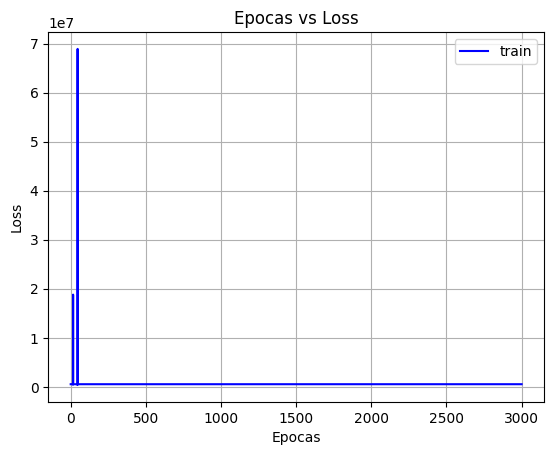

In [15]:
loss_mae=hist.history["loss"]
loss_mse=hist.history["mse"]
#epochs=range(1,101)
epochs=range(1,len(loss_mae)+1)


plt.plot(epochs,loss_mae,"b",label="train")
plt.legend()

plt.xlabel("Epocas")
plt.ylabel("Loss")
plt.title("Epocas vs Loss")
plt.grid()
plt.plot()

In [16]:
# testeo
y_test_est = modelo.predict(xe_test)

df_ytest = pd.DataFrame({"Reales":y_test})
df_ytest["EStimados"] = y_test_est
print(df_ytest)

1/1 [==============================] - 0s 164ms/step
    Reales   EStimados
0   316386  299.609070
3   444698  299.609161
12  381728  299.609070
15  433380  299.609070
21  795890  299.609070


In [17]:
#Funciones de perdida
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

y_real= df_ytest["Reales"]
y_est = df_ytest["EStimados"]

MAE_test= mean_absolute_error(y_real,y_est)
MSE_test=  mean_squared_error(y_real,y_est)
r2_test =           r2_score(y_real,y_est)



print("MAE_test: ",MAE_test)
print("MSE_test: ",MSE_test)
print("r2_test: ",r2_test)

MAE_test:  474116.79091186525
MSE_test:  252682169773.49365
r2_test:  -8.058189608734336


In [18]:
#Prediccion
x_new = pd.DataFrame({"Baños":[1],
                      "Dormitorios":[2],
                      "Tamaño":[71],
                      })

#x_new = pd.DataFrame({"Baños":[1,2],
 #                     "Dormitorios":[2,4],
#                      "Tamaño":[71,93],
#                      })


xe_new = escala(x_new)
y_pred =modelo.predict(xe_new)
print("Datos:\n",x_new)
print("La prediccion es",y_pred )

1/1 [==============================] - 0s 49ms/step
Datos:
    Baños  Dormitorios  Tamaño
0      1            2      71
La prediccion es [[299.6096]]
